In [100]:
import pandas as pd
import numpy as np
import math
import seaborn as sn
#haven't done optimization, code is messy, refer the questions parallely to figure out
#use max to figureout the max value whenever needed


In [4]:
df=pd.read_csv(r"C:\Users\ullasa shetty\Desktop\ml\summer analytics\Chicago_Crime_Detective.csv")
df.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,12/31/12 23:15,STREET,False,False,623,6,69,2012
1,1,8951141,12/31/12 22:00,STREET,False,False,1213,12,24,2012
2,2,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),False,False,1622,16,11,2012
3,3,8952223,12/31/12 22:00,STREET,False,False,724,7,67,2012
4,4,8951608,12/31/12 21:30,STREET,False,False,211,2,35,2012
5,5,8950793,12/31/12 20:30,STREET,True,False,2521,25,19,2012
6,6,8950760,12/31/12 20:10,STREET,False,False,423,4,48,2012
7,7,8951611,12/31/12 20:00,STREET,False,False,231,2,40,2012
8,8,8951802,12/31/12 19:00,STREET,True,False,1021,10,29,2012
9,9,8950706,12/31/12 18:00,STREET,False,False,1215,12,24,2012


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 10 columns):
Unnamed: 0             191641 non-null int64
ID                     191641 non-null int64
Date                   191641 non-null object
LocationDescription    191641 non-null object
Arrest                 191641 non-null bool
Domestic               191641 non-null bool
Beat                   191641 non-null int64
District               148589 non-null object
CommunityArea          167038 non-null object
Year                   191641 non-null int64
dtypes: bool(2), int64(4), object(4)
memory usage: 12.1+ MB


In [8]:
df.describe()

,Unnamed: 0,ID,Beat,Year
count,191641.000000,1.916410e+05,191641.000000,191641.000000
mean,95820.000000,4.968629e+06,1258.810771,2006.134940
std,55322.135806,2.342997e+06,702.530465,3.520285
min,0.000000,1.310022e+06,111.000000,2001.000000
25%,47910.000000,2.832144e+06,722.000000,2003.000000
50%,95820.000000,4.762956e+06,1121.000000,2006.000000
75%,143730.000000,7.201878e+06,1733.000000,2009.000000
max,191640.000000,9.181151e+06,2535.000000,2012.000000


In [316]:
#Month and Year of the median date in our dataset
#first approach to solve median
#you can convert the date to datetime64[ns] or pandas library to_datetime
#i just tried both to explore but usually pandas library to_datetime is preffered because it has lot of inbuilt functions to ease your work
median=df["Date"].astype('datetime64[ns]').quantile(.5)
print('median date is --->',median)

median date is ---> 2006-05-21 12:30:00


In [317]:
#another method to find out median date
#a bit complicated one but here you can see how pandas is built on numpy array
d=df["Date"].astype('datetime64[ns]')
dat=np.array(d)
df2=pd.DataFrame(dat)
median=math.floor(df2[0].astype('int64').median())
result=np.datetime64(median,"ns")
print(result)


2006-05-21T12:30:00.000000000


In [70]:
#year wise motor vehicle theft
df2.info()
df["Year"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191641 entries, 0 to 191640
Data columns (total 1 columns):
0    191641 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.5 MB


2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Year, dtype: int64

In [321]:
#Month and Year of the median date in our dataset using pandas to_datetime function
#
df['Date'] = pd.to_datetime(df['Date'])
med=df['Date'].quantile(.5)
print("median date is------>",med)

median date is------> 2006-05-21 12:30:00


In [352]:
#In which month did the lowest motor vehicle thefts occur? 
complete_month=df["Date"].dt.strftime("%B").value_counts()    #%B shows date in months
print("complete month wise details motor vehicle theft details are")
print("------"*10)
print(complete_month)
print("------"*10)
lowest_month=complete_month.min()    #lowest month value
print("month which has lowest motor vehicle theft is")
print(complete_month[complete_month==13511].index.tolist(),"------>",lowest_month)

complete month wise details motor vehicle theft details are
------------------------------------------------------------
October      17086
July         16801
August       16572
December     16426
November     16063
September    16060
January      16047
May          16035
June         16002
March        15758
April        15280
February     13511
Name: Date, dtype: int64
------------------------------------------------------------
month which has lowest motor vehicle theft is
['February'] ------> 13511


In [356]:
#On which weekday did most motor vehicle thefts occur?
complete_day=df["Date"].dt.strftime("%A").value_counts()
print("complete week day wise details motor vehicle theft details are")
print("------"*10)
print(complete_day)
print("------"*10)
lowest_day=complete_day.min()            #lowest day value
print("week day which has lowest motor vehicle theft is")
print(complete_day[complete_day==26316].index.tolist(),"------>",lowest_day)

complete week day wise details motor vehicle theft details are
------------------------------------------------------------
Friday       29284
Wednesday    27416
Monday       27397
Thursday     27319
Saturday     27118
Tuesday      26791
Sunday       26316
Name: Date, dtype: int64
------------------------------------------------------------
week day which has lowest motor vehicle theft is
['Sunday'] ------> 26316


In [365]:
#Which month has the largest number of motor vehicle thefts for which an arrest was made? 
arrest_month=df[df.Arrest==True].groupby(df['Date'].dt.strftime("%B")).count()     
max_month= c["Arrest"].max()
print('month which has the largest number of motor vehicle thefts for which an arrest was made')
print(arrest_month[arrest_month['Arrest']==1435].index.tolist(),"----->",max_month)
print("------"*10)
print("months where arrests made on motor vehicle theft")
arrest_month

month which has the largest number of motor vehicle thefts for which an arrest was made
['January'] -----> 1435
------------------------------------------------------------
months where arrests made on motor vehicle theft


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
Date,,,,,,,,,,
April,1252,1252,1252,1252,1252,1252,1252,903,1036,1252
August,1329,1329,1329,1329,1329,1329,1329,964,1144,1329
December,1397,1397,1397,1397,1397,1397,1397,1004,1179,1397
February,1238,1238,1238,1238,1238,1238,1238,765,895,1238
January,1435,1435,1435,1435,1435,1435,1435,924,1077,1435
July,1324,1324,1324,1324,1324,1324,1324,954,1113,1324
June,1230,1230,1230,1230,1230,1230,1230,926,1078,1230
March,1298,1298,1298,1298,1298,1298,1298,880,980,1298
May,1187,1187,1187,1187,1187,1187,1187,867,1059,1187


In [378]:
#Which month has the largest number of motor vehicle thefts for which an arrest was made?
# eliminated unnesccesary things and optimized code
#print(c[c.Date==c.Date.max()])  this will directly print the result without any hustle
month2=df[df.Arrest==True].groupby(df['Date'].dt.strftime("%B")).agg({'Date':'count'})
print('month which has the largest number of motor vehicle thefts for which an arrest was made')
print(month2[month2['Date']==1435].index.tolist())
print("------"*10)
print("months where arrests made on motor vehicle theft")
month2

month which has the largest number of motor vehicle thefts for which an arrest was made
['January']
------------------------------------------------------------
months where arrests made on motor vehicle theft


,Date
Date,
April,1252
August,1329
December,1397
February,1238
January,1435
July,1324
June,1230
March,1298
May,1187


In [391]:
#Crimes for which more arrests were made are in the first half of the time period or the second half of the time period?
#period is from 2001 to 2012
arrest_year=df[df.Arrest==True].groupby(df['Date'].dt.strftime("%Y")).agg({'Date':'count'})
arr_period1=arrest_year[arrest_year.index<='2006'].sum()    #arrest in first period till 2006
print('period1 is ------>',arr_period1)
arr_period2=arrest_year[arrest_year.index>'2006'].sum()    #arrest in first period from 2007 to 2012
print('period2 is ------>',arr_period2)

arrest_year


period1 is ------> Date    10588
dtype: int64
period2 is ------> Date    4948
dtype: int64


,Date
Date,
2001,2152
2002,2115
2003,1798
2004,1693
2005,1528
2006,1302
2007,1212
2008,1020
2009,840


In [394]:
#Crimes in first half of the time period and the second half of the time period

year=df["Date"].dt.strftime("%Y").value_counts()
period=year.to_frame()
period1=period[period.index<='2006'].sum()
print('period1 is ------>',period1)
period2=period[period.index>'2006'].sum()
print('period2 is  -------->',period2)
year

period1 is ------> Date    105523
dtype: int64
period2 is  --------> Date    86118
dtype: int64


2001    20669
2002    18753
2004    16862
2003    16657
2005    16484
2006    16098
2011    15637
2010    15497
2008    14445
2007    14280
2012    14092
2009    12167
Name: Date, dtype: int64

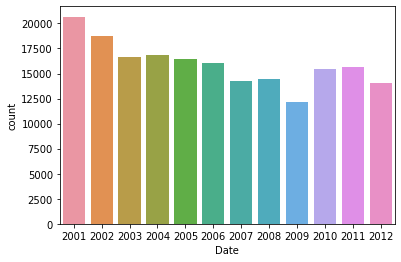

In [392]:
#GRAPHICAL REPRESENTATION OF CRIME RATE

sn.countplot(x=df["Date"].dt.strftime("%Y"),data=df)


In [410]:
 #proportion of motor vehicle thefts in 2001 was an arrest made?
arrest_made=df[df.Arrest==True].groupby(df['Date'].dt.strftime("%Y")).agg({'Date':'count'})
arrest_2001=arrest_made.loc['2001']
print("arrest made for vehicle theft in 2001---->",arrest_2001)
total_crime_2001=year.loc['2001']
print("total number of vehicle theft in 2001----->",total_crime_2001)         #go back to previous cell to know more.
propotion=arrest_2001/total_crime_2001
print("propotion of arrest made in 2001 for motor vehicle theft",propotion)
print("------"*10)
print("total arrest made")
arrest_made

arrest made for vehicle theft in 2001----> Date    2152
Name: 2001, dtype: int64
total number of vehicle theft in 2001-----> 20669
propotion of arrest made in 2001 for motor vehicle theft Date    0.104117
Name: 2001, dtype: float64
------------------------------------------------------------
total arrest made


,Date
Date,
2001,2152
2002,2115
2003,1798
2004,1693
2005,1528
2006,1302
2007,1212
2008,1020
2009,840


In [412]:
#For what proportion of motor vehicle thefts in 2007 was an arrest made?
arrest_2007=arrest_made.loc['2007']
print("arrest made for vehicle theft in 2007---->",arrest_2007)
total_crime_2007=year.loc['2007']
print("total number of vehicle theft in 2007----->",total_crime_2007)         
propotion2=arrest_2007/total_crime_2007
print("propotion of arrest made in 2007 for motor vehicle theft",propotion2)
print("------"*10)
print("total arrest made")
arrest_made

arrest made for vehicle theft in 2007----> Date    1212
Name: 2007, dtype: int64
total number of vehicle theft in 2007-----> 14280
propotion of arrest made in 2007 for motor vehicle theft Date    0.084874
Name: 2007, dtype: float64
------------------------------------------------------------
total arrest made


,Date
Date,
2001,2152
2002,2115
2003,1798
2004,1693
2005,1528
2006,1302
2007,1212
2008,1020
2009,840


In [207]:
#top five locations for motor vehicle thefts except other
df['LocationDescription'].value_counts().nlargest(6)

STREET                            156564
PARKING LOT/GARAGE(NON.RESID.)     14852
OTHER                               4573
ALLEY                               2308
GAS STATION                         2111
DRIVEWAY - RESIDENTIAL              1675
Name: LocationDescription, dtype: int64

In [416]:
#How many observations are in Top5?
subset=df.loc[df["LocationDescription"].isin(['STREET','PARKING LOT/GARAGE(NON.RESID.)','ALLEY','GAS STATION', 'DRIVEWAY - RESIDENTIAL'])]
print("number of observations in subset of top5 locations date is---->",subset.shape)    
subset

number of observations in subset of top5 locations date is----> (177510, 10)


,Unnamed: 0,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year
0,0,8951354,2012-12-31 23:15:00,STREET,False,False,623,6,69,2012
1,1,8951141,2012-12-31 22:00:00,STREET,False,False,1213,12,24,2012
3,3,8952223,2012-12-31 22:00:00,STREET,False,False,724,7,67,2012
4,4,8951608,2012-12-31 21:30:00,STREET,False,False,211,2,35,2012
5,5,8950793,2012-12-31 20:30:00,STREET,True,False,2521,25,19,2012
6,6,8950760,2012-12-31 20:10:00,STREET,False,False,423,4,48,2012
7,7,8951611,2012-12-31 20:00:00,STREET,False,False,231,2,40,2012
8,8,8951802,2012-12-31 19:00:00,STREET,True,False,1021,10,29,2012
9,9,8950706,2012-12-31 18:00:00,STREET,False,False,1215,12,24,2012
10,10,8951585,2012-12-31 18:00:00,STREET,False,False,1011,10,29,2012


In [418]:
#On which day of the week do the most motor vehicle thefts at gas stations happen? 
gas=subset[subset.LocationDescription=='GAS STATION'].groupby([subset['Date'].dt.strftime("%A")]).agg({'Date':'count',})
print("day of the week when most of the motor vehicle theft happened")
print(gas[gas.Date==338].index.tolist())
print("maximum number of theft on that day is")
print(gas.max())
gas

day of the week when most of the motor vehicle theft happened
['Saturday']
maximum number of theft on that day is
Date    338
dtype: int64


,Date
Date,
Friday,332
Monday,280
Saturday,338
Sunday,336
Thursday,282
Tuesday,270
Wednesday,273
